In [30]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.utils import resample

In [31]:
df=pd.read_csv("mcdonalds.csv")
print(df.columns)

Index(['yummy', 'convenient', 'spicy', 'fattening', 'greasy', 'fast', 'cheap',
       'tasty', 'expensive', 'healthy', 'disgusting', 'Like', 'Age',
       'VisitFrequency', 'Gender'],
      dtype='object')


In [32]:
df.shape

(1453, 15)

In [33]:
df.head(3)

,yummy,convenient,spicy,fattening,greasy,fast,cheap,tasty,expensive,healthy,disgusting,Like,Age,VisitFrequency,Gender
0,No,Yes,No,Yes,No,Yes,Yes,No,Yes,No,No,-3,61,Every three months,Female
1,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,Yes,No,No,+2,51,Every three months,Female
2,No,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes,No,+1,62,Every three months,Female


In [34]:
md=df.iloc[:,0:11]
md

,yummy,convenient,spicy,fattening,greasy,fast,cheap,tasty,expensive,healthy,disgusting
0,No,Yes,No,Yes,No,Yes,Yes,No,Yes,No,No
1,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,Yes,No,No
2,No,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes,No
3,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,No,No,Yes
4,No,Yes,No,Yes,Yes,Yes,Yes,No,No,Yes,No
...,...,...,...,...,...,...,...,...,...,...,...
1448,No,Yes,No,Yes,Yes,No,No,No,Yes,No,Yes
1449,Yes,Yes,No,Yes,No,No,Yes,Yes,No,Yes,No
1450,Yes,Yes,No,Yes,No,Yes,No,Yes,Yes,No,No
1451,Yes,Yes,No,No,No,Yes,Yes,Yes,No,Yes,No


In [35]:
MD=md.replace({'Yes': 1, 'No': 0})
MD

,yummy,convenient,spicy,fattening,greasy,fast,cheap,tasty,expensive,healthy,disgusting
0,0,1,0,1,0,1,1,0,1,0,0
1,1,1,0,1,1,1,1,1,1,0,0
2,0,1,1,1,1,1,0,1,1,1,0
3,1,1,0,1,1,1,1,1,0,0,1
4,0,1,0,1,1,1,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...
1448,0,1,0,1,1,0,0,0,1,0,1
1449,1,1,0,1,0,0,1,1,0,1,0
1450,1,1,0,1,0,1,0,1,1,0,0
1451,1,1,0,0,0,1,1,1,0,1,0


In [36]:
mean=round(MD.mean(),2)
mean

yummy         0.55
convenient    0.91
spicy         0.09
fattening     0.87
greasy        0.53
fast          0.90
cheap         0.60
tasty         0.64
expensive     0.36
healthy       0.20
disgusting    0.24
dtype: float64

In [37]:
from sklearn.decomposition import PCA

In [38]:
pca = PCA()
MD_pca=pca.fit_transform(MD)
MD_p=pca.fit(MD)

SD=np.sqrt(pca.explained_variance_)
PV=pca.explained_variance_ratio_
index=[]
for i in range(len(SD)):
    i=i+1
    index.append("PC{}".format(i))

sum=pd.DataFrame({
    "Standard deviation":SD,"Proportion of Variance":PV,"Cumulative Proportion":PV.cumsum()
},index=index)
sum

,Standard deviation,Proportion of Variance,Cumulative Proportion
PC1,0.757050,0.299447,0.299447
PC2,0.607456,0.192797,0.492244
PC3,0.504619,0.133045,0.625290
PC4,0.398799,0.083096,0.708386
PC5,0.337405,0.059481,0.767866
PC6,0.310275,0.050300,0.818166
PC7,0.289697,0.043849,0.862015
PC8,0.275122,0.039548,0.901563
PC9,0.265251,0.036761,0.938323
PC10,0.248842,0.032353,0.970677


In [39]:
print("Standard Deviation:\n",SD.round(1))

load = (pca.components_)
i=0
rot_matrix = MD_p.components_.T

rot_df = pd.DataFrame(rot_matrix, index=MD.columns.values, columns=index)
rot_df=round(-rot_df,3)
rot_df

Standard Deviation:
 [0.8 0.6 0.5 0.4 0.3 0.3 0.3 0.3 0.3 0.2 0.2]


,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11
yummy,0.477,-0.364,0.304,-0.055,0.308,-0.171,0.281,-0.013,-0.572,0.110,-0.045
convenient,0.155,-0.016,0.063,0.142,-0.278,0.348,0.060,0.113,0.018,0.666,0.542
spicy,0.006,-0.019,0.037,-0.198,-0.071,0.355,-0.708,-0.376,-0.400,0.076,-0.142
fattening,-0.116,0.034,0.322,0.354,0.073,0.407,0.386,-0.590,0.161,0.005,-0.251
greasy,-0.304,0.064,0.802,-0.254,-0.361,-0.209,-0.036,0.138,0.003,-0.009,-0.002
fast,0.108,0.087,0.065,0.097,-0.108,0.595,0.087,0.628,-0.166,-0.240,-0.339
cheap,0.337,0.611,0.149,-0.119,0.129,0.103,0.040,-0.140,-0.076,-0.428,0.489
tasty,0.472,-0.307,0.287,0.003,0.211,0.077,-0.360,0.073,0.639,-0.079,-0.020
expensive,-0.329,-0.601,-0.024,-0.068,0.003,0.261,0.068,-0.030,-0.067,-0.454,0.490
healthy,0.214,-0.077,-0.192,-0.763,-0.288,0.178,0.350,-0.176,0.186,0.038,-0.158


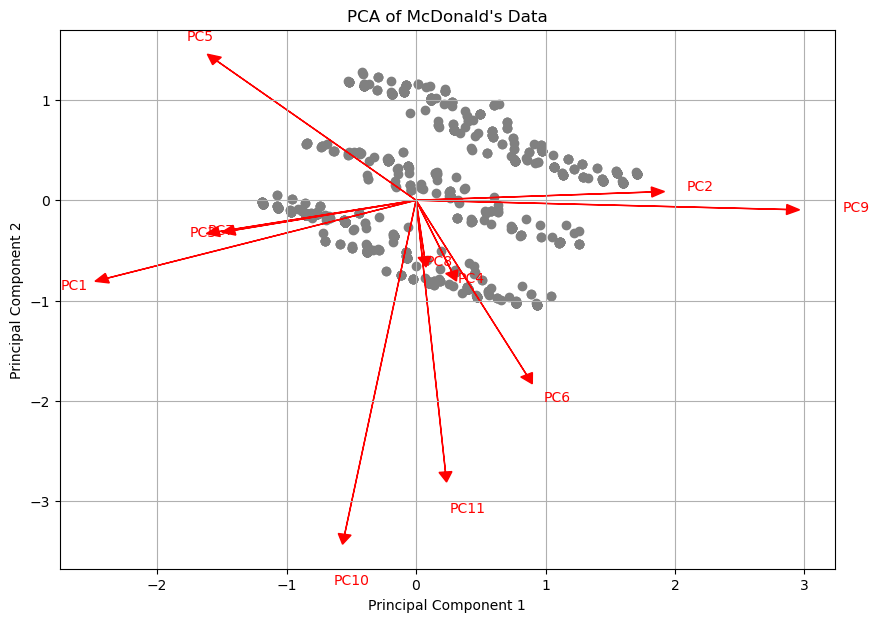

In [40]:
import matplotlib.pyplot as plt
MD_pca_scores = pca.fit_transform(MD)
plt.figure(figsize=(10, 7))
plt.scatter(MD_pca_scores[:, 0], MD_pca_scores[:, 1], color='grey')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA of McDonald\'s Data')
plt.grid(True)
scale_factor = 5
for i, (component, variance) in enumerate(zip(pca.components_, pca.explained_variance_ratio_)):
    plt.arrow(0, 0, component[0] * scale_factor, component[1] * scale_factor, 
              head_width=0.1, head_length=0.1, color='red')
    plt.text(component[0] * scale_factor * 1.15, component[1] * scale_factor * 1.15, 
             f'PC{i+1}', color='red')

# Show the plot
plt.show()

In [41]:
pip install pandas numpy scikit-learn matplotlib kneed


Note: you may need to restart the kernel to use updated packages.


In [42]:
from sklearn.cluster import KMeans
from kneed import KneeLocator
inertias = []
for k in range(2, 9):
    kmeans = KMeans(n_clusters=k, n_init=10, random_state=1234)
    kmeans.fit(MD)
    inertias.append(kmeans.inertia_)
kl = KneeLocator(range(2, 9), inertias, curve='convex', direction='decreasing')
best_k = kl.elbow
best_kmeans = KMeans(n_clusters=best_k, n_init=10, random_state=1234)
best_kmeans.fit(MD)
print("Cluster Centers before relabeling:")
print(best_kmeans.cluster_centers_)

Cluster Centers before relabeling:
[[ 1.32158590e-02  6.51982379e-01  8.37004405e-02  9.11894273e-01
   7.18061674e-01  7.31277533e-01  6.16740088e-02  9.69162996e-02
   9.47136564e-01  6.60792952e-02  7.04845815e-01]
 [ 7.92880259e-01  9.80582524e-01  1.22977346e-01  9.70873786e-01
   1.00000000e+00  9.48220065e-01  8.93203883e-01  9.54692557e-01
   1.06796117e-01  1.81229773e-01  1.71521036e-01]
 [ 8.70078740e-01  9.60629921e-01  9.84251969e-02  8.85826772e-01
   5.19685039e-01  8.38582677e-01 -2.22044605e-16  9.40944882e-01
   1.00000000e+00  1.92913386e-01  6.29921260e-02]
 [ 8.46547315e-01  9.76982097e-01  9.20716113e-02  7.10997442e-01
   0.00000000e+00  9.64194373e-01  8.84910486e-01  9.66751918e-01
   3.06905371e-02  3.75959079e-01  1.53452685e-02]
 [ 1.10294118e-02  8.89705882e-01  6.61764706e-02  9.19117647e-01
   5.91911765e-01  9.52205882e-01  8.60294118e-01  7.35294118e-03
   2.20588235e-02  8.08823529e-02  4.33823529e-01]]


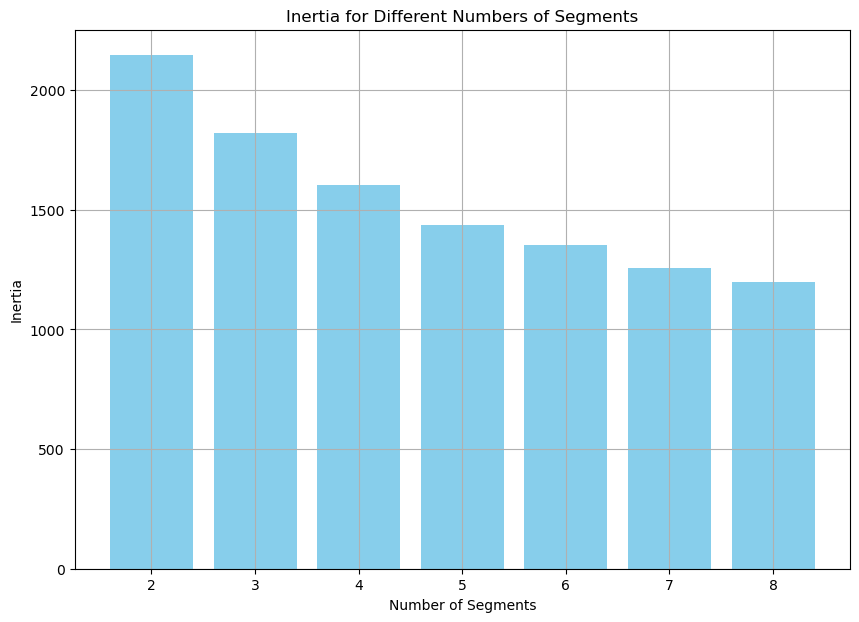

In [43]:
np.random.seed(1234)
inertias = []
for k in range(2, 9):
    best_inertia = np.inf
    for _ in range(10):  
        kmeans = KMeans(n_clusters=k, n_init=1, max_iter=300, random_state=None)
        kmeans.fit(MD)
        if kmeans.inertia_ < best_inertia:
            best_inertia = kmeans.inertia_
    inertias.append(best_inertia)
plt.figure(figsize=(10, 7))
plt.bar(range(2, 9), inertias, color='skyblue')
plt.xlabel('Number of Segments')
plt.ylabel('Inertia')
plt.title('Inertia for Different Numbers of Segments')
plt.xticks(range(2, 9))
plt.grid(True)
plt.show()

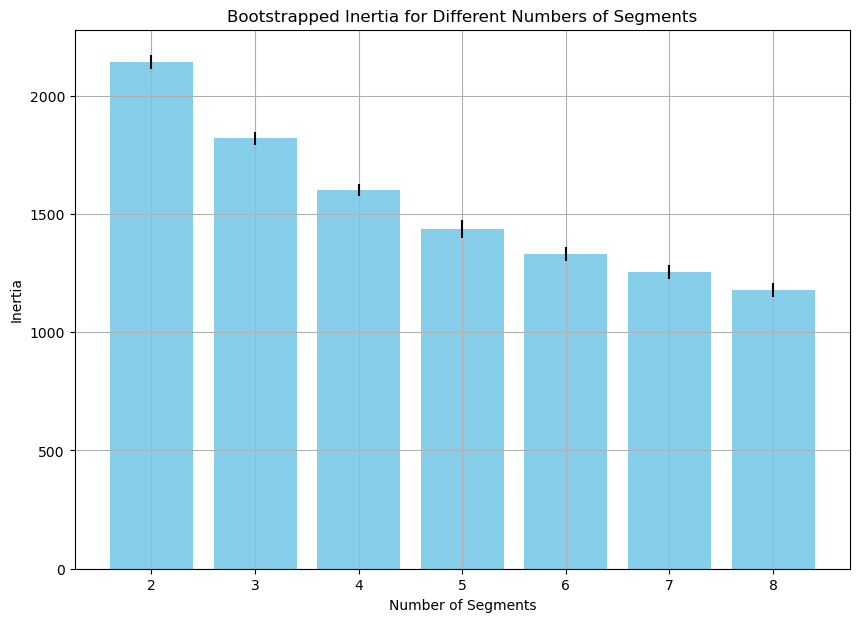

In [44]:
nboot = 100
boot_results = {k: [] for k in range(2, 9)}
for k in range(2, 9):
    for _ in range(nboot):
        MD_resampled = resample(MD, replace=True, n_samples=len(MD), random_state=None)
        best_inertia = np.inf
        for _ in range(10):  
            kmeans = KMeans(n_clusters=k, n_init=1, max_iter=300, random_state=None)
            kmeans.fit(MD_resampled)
            if kmeans.inertia_ < best_inertia:
                best_inertia = kmeans.inertia_
        boot_results[k].append(best_inertia)
plt.figure(figsize=(10, 7))
for k in boot_results:
    plt.bar(k, np.mean(boot_results[k]), yerr=np.std(boot_results[k]), color='skyblue')
plt.xlabel('Number of Segments')
plt.ylabel('Inertia')
plt.title('Bootstrapped Inertia for Different Numbers of Segments')
plt.xticks(range(2, 9))
plt.grid(True)
plt.show()

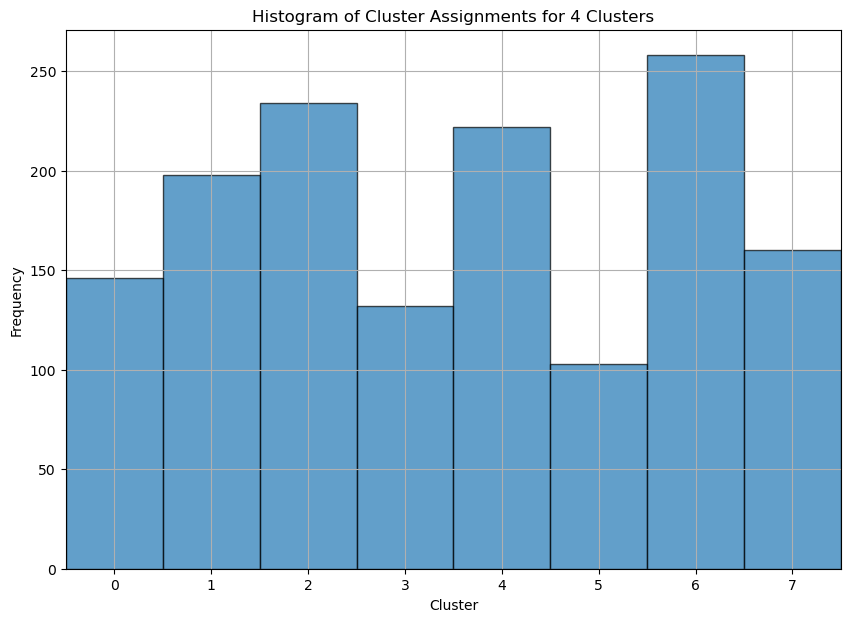

In [45]:
cluster_assignments = kmeans.labels_
plt.figure(figsize=(10, 7))
plt.hist(cluster_assignments, bins=np.arange(k + 1) - 0.5, edgecolor='black', alpha=0.7)
plt.xlabel('Cluster')
plt.ylabel('Frequency')
plt.title('Histogram of Cluster Assignments for 4 Clusters')
plt.xticks(range(k))
plt.xlim(-0.5, k - 0.5)
plt.grid(True)
plt.show()

In [58]:
k_values = range(2, 9)
stability_scores = []
for k in k_values:
    kmeans = KMeans(n_clusters=k, n_init=10, max_iter=300, random_state=1234)
    kmeans.fit(MD)
    cluster_assignments = kmeans.labels_
    score = silhouette_score(MD, cluster_assignments)
    stability_scores.append(score)


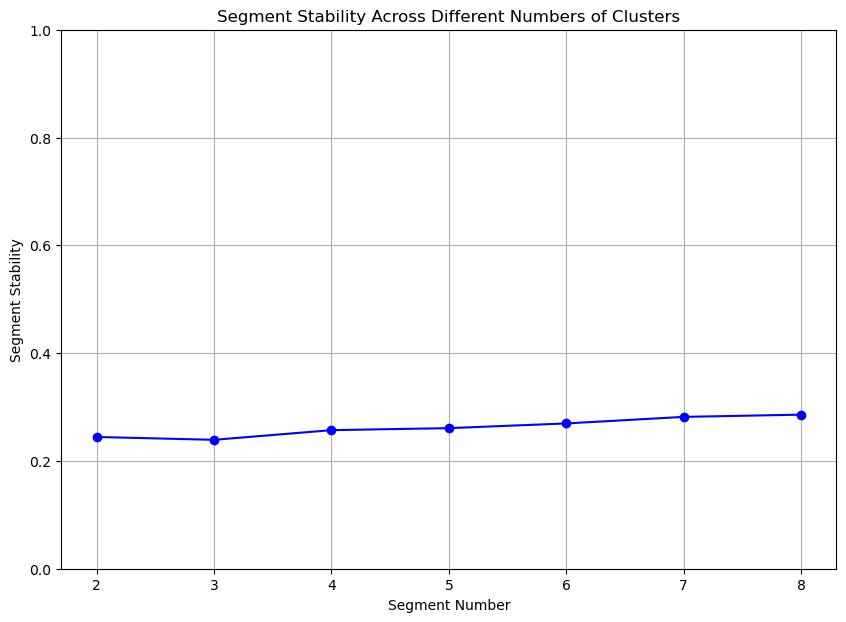

In [61]:
plt.figure(figsize=(10, 7))
plt.plot(k_values, stability_scores, marker='o', linestyle='-', color='b')
plt.xlabel('Segment Number')
plt.ylabel('Segment Stability')
plt.title('Segment Stability Across Different Numbers of Clusters')
plt.ylim(0, 1)
plt.grid(True)
plt.show()

In [64]:
from sklearn.mixture import GaussianMixture
from sklearn.metrics import log_loss
k_range = range(2, 9)
gmm_models = {}
log_losses = []

for k in k_range:
    gmm = GaussianMixture(n_components=k, n_init=10, random_state=1234)
    gmm.fit(MD)
    gmm_models[k] = gmm
    
    
    probs = gmm.predict_proba(MD)
    
    
    log_losses.append(log_loss(np.argmax(probs, axis=1), probs))


for k, model in gmm_models.items():
    print(f"Model with {k} clusters:")
    print(f"  Converged: {model.converged_}")
    print(f"  AIC: {model.aic(MD)}")
    print(f"  BIC: {model.bic(MD)}\n")

C:\Users\Aarti Kumari\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:2916: UserWarning: The y_pred values do not sum to one. Starting from 1.5 thiswill result in an error.
  warnings.warn(
C:\Users\Aarti Kumari\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:2916: UserWarning: The y_pred values do not sum to one. Starting from 1.5 thiswill result in an error.
  warnings.warn(
C:\Users\Aarti Kumari\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:2916: UserWarning: The y_pred values do not sum to one. Starting from 1.5 thiswill result in an error.
  warnings.warn(
C:\Users\Aarti Kumari\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:2916: UserWarning: The y_pred values do not sum to one. Starting from 1.5 thiswill result in an error.
  warnings.warn(


Model with 2 clusters:
  Converged: True
  AIC: -21985.64184966374
  BIC: -21167.02707181035

Model with 3 clusters:
  Converged: True
  AIC: -27786.899424694573
  BIC: -26556.336565082696

Model with 4 clusters:
  Converged: True
  AIC: -34405.083804457085
  BIC: -32762.572863086727

Model with 5 clusters:
  Converged: True
  AIC: -44223.86338162658
  BIC: -42169.40435849774

Model with 6 clusters:
  Converged: True
  AIC: -56110.08402145092
  BIC: -53643.6769165636

Model with 7 clusters:
  Converged: True
  AIC: -58214.952913588226
  BIC: -55336.59772694242

Model with 8 clusters:
  Converged: True
  AIC: -52183.62036754436
  BIC: -48893.31709914008



C:\Users\Aarti Kumari\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:2916: UserWarning: The y_pred values do not sum to one. Starting from 1.5 thiswill result in an error.
  warnings.warn(


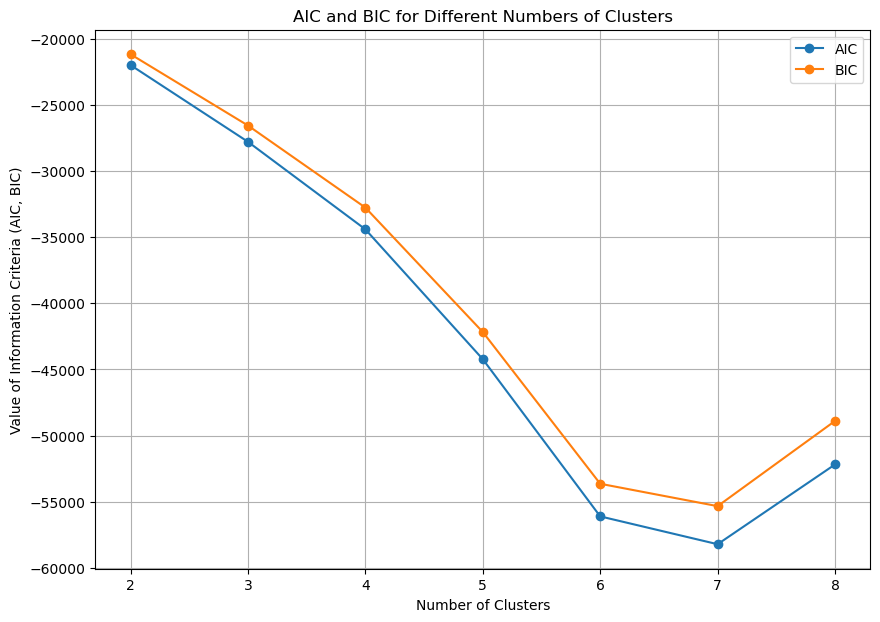

In [66]:
k_range = range(2, 9)
aic_values = []
bic_values = []

for k in k_range:
    gmm = GaussianMixture(n_components=k, n_init=10, random_state=1234)
    gmm.fit(MD)
    
    
    aic_values.append(gmm.aic(MD))
    bic_values.append(gmm.bic(MD))


plt.figure(figsize=(10, 7))
plt.plot(k_range, aic_values, marker='o', label='AIC')
plt.plot(k_range, bic_values, marker='o', label='BIC')
plt.xlabel('Number of Clusters')
plt.ylabel('Value of Information Criteria (AIC, BIC)')
plt.title('AIC and BIC for Different Numbers of Clusters')
plt.legend()
plt.grid(True)
plt.show()

In [68]:
from sklearn.mixture import GaussianMixture
from sklearn.metrics import confusion_matrix
kmeans = KMeans(n_clusters=4, n_init=10, random_state=1234)
kmeans.fit(MD)
clusters_kmeans = kmeans.labels_
gmm = GaussianMixture(n_components=4, n_init=10, random_state=1234)
gmm.fit(MD)
clusters_gmm = gmm.predict(MD)
conf_matrix = confusion_matrix(clusters_kmeans, clusters_gmm)
print("Confusion Matrix:")
print(conf_matrix)
conf_matrix_df = pd.DataFrame(conf_matrix, 
                              index=[f'KMeans_{i}' for i in range(4)],
                              columns=[f'GMM_{i}' for i in range(4)])
print("\nConfusion Matrix DataFrame:")
print(conf_matrix_df)

Confusion Matrix:
[[ 31  51 268  14]
 [  4 214   0  22]
 [143   0 362  28]
 [  0   3   0 313]]

Confusion Matrix DataFrame:
          GMM_0  GMM_1  GMM_2  GMM_3
KMeans_0     31     51    268     14
KMeans_1      4    214      0     22
KMeans_2    143      0    362     28
KMeans_3      0      3      0    313


In [69]:
conf_matrix = confusion_matrix(clusters_kmeans, clusters_gmm)
print("Confusion Matrix:")
print(conf_matrix)

Confusion Matrix:
[[ 31  51 268  14]
 [  4 214   0  22]
 [143   0 362  28]
 [  0   3   0 313]]


In [71]:
gmm = GaussianMixture(n_components=4, n_init=10, random_state=1234)
gmm.fit(MD)
log_likelihood = gmm.score(MD) * MD.shape[0]
print("Log-Likelihood:", log_likelihood)

Log-Likelihood: 17513.541902228542


In [73]:
like_counts = df['Like'].value_counts()
like_counts_reversed = like_counts.sort_index(ascending=False)
print(like_counts_reversed)

Like
I love it!+5    143
I hate it!-5    152
0               169
-4               71
-3               73
-2               59
-1               58
+4              160
+3              229
+2              187
+1              152
Name: count, dtype: int64


In [75]:
df['Like_n'] = 6 - pd.to_numeric(df['Like'], errors='coerce')
like_n_counts = df['Like_n'].value_counts()
print(like_n_counts)

Like_n
3.0     229
4.0     187
6.0     169
2.0     160
5.0     152
9.0      73
10.0     71
8.0      59
7.0      58
Name: count, dtype: int64


In [77]:
column_names = df.columns[0:11]  
f = ' + '.join(column_names) 
f = f'Like_n ~ {f}' 
print(f)

Like_n ~ yummy + convenient + spicy + fattening + greasy + fast + cheap + tasty + expensive + healthy + disgusting


In [80]:
from sklearn.preprocessing import LabelEncoder
X = df.iloc[:, 0:11]
y = df['Like_n']
X = X.apply(LabelEncoder().fit_transform)
np.random.seed(1234)
gmm = GaussianMixture(n_components=2, n_init=10, random_state=1234)
gmm.fit(X)
print("Gaussian Mixture Model:")
print("Converged:", gmm.converged_)
print("Means:\n", gmm.means_)
print("Covariances:\n", gmm.covariances_)
print("Weights:\n", gmm.weights_)

Gaussian Mixture Model:
Converged: True
Means:
 [[0.6822335  1.         0.09238579 0.84974619 0.43350254 1.
  0.66598985 0.77664975 0.27817259 0.24263959 0.        ]
 [0.27991453 0.71367521 0.09615385 0.90384615 0.72222222 0.69017094
  0.45726496 0.36538462 0.52564103 0.10683761 0.7542735 ]]
Covariances:
 [[[ 2.16791951e-01  1.25032451e-29 -6.17588704e-03 -8.15171739e-03
   -8.44031024e-03  1.25032451e-29  3.50743384e-03  1.18874488e-01
    8.19088355e-03  3.54783684e-02  0.00000000e+00]
  [ 1.25000416e-29  1.00000000e-06  1.75551584e-30  1.56314590e-29
    8.34911161e-30  1.77986742e-29  1.22677882e-29  1.45371648e-29
    5.35304192e-30  4.54095567e-30  0.00000000e+00]
  [-6.17588704e-03  1.74270186e-30  8.38516532e-02 -7.43848077e-03
    7.66626298e-03  1.74270186e-30  4.00937925e-04  4.39073411e-03
    6.78811616e-03  8.04040300e-03  0.00000000e+00]
  [-8.15171739e-03  1.55946188e-29 -7.43848077e-03  1.27678601e-01
    5.09222088e-02  1.55946188e-29 -7.54670309e-03 -8.17851530e-03
 

In [82]:
gmm_initial = GaussianMixture(n_components=2, n_init=10, random_state=1234)
gmm_initial.fit(X)
gmm_refit = GaussianMixture(n_components=2, n_init=10, random_state=1234)
gmm_refit.fit(X)
print("Refitted Gaussian Mixture Model:")
print("Converged:", gmm_refit.converged_)
print("Means:\n", gmm_refit.means_)
print("Covariances:\n", gmm_refit.covariances_)
print("Weights:\n", gmm_refit.weights_)

Refitted Gaussian Mixture Model:
Converged: True
Means:
 [[0.6822335  1.         0.09238579 0.84974619 0.43350254 1.
  0.66598985 0.77664975 0.27817259 0.24263959 0.        ]
 [0.27991453 0.71367521 0.09615385 0.90384615 0.72222222 0.69017094
  0.45726496 0.36538462 0.52564103 0.10683761 0.7542735 ]]
Covariances:
 [[[ 2.16791951e-01  1.25032451e-29 -6.17588704e-03 -8.15171739e-03
   -8.44031024e-03  1.25032451e-29  3.50743384e-03  1.18874488e-01
    8.19088355e-03  3.54783684e-02  0.00000000e+00]
  [ 1.25000416e-29  1.00000000e-06  1.75551584e-30  1.56314590e-29
    8.34911161e-30  1.77986742e-29  1.22677882e-29  1.45371648e-29
    5.35304192e-30  4.54095567e-30  0.00000000e+00]
  [-6.17588704e-03  1.74270186e-30  8.38516532e-02 -7.43848077e-03
    7.66626298e-03  1.74270186e-30  4.00937925e-04  4.39073411e-03
    6.78811616e-03  8.04040300e-03  0.00000000e+00]
  [-8.15171739e-03  1.55946188e-29 -7.43848077e-03  1.27678601e-01
    5.09222088e-02  1.55946188e-29 -7.54670309e-03 -8.17851

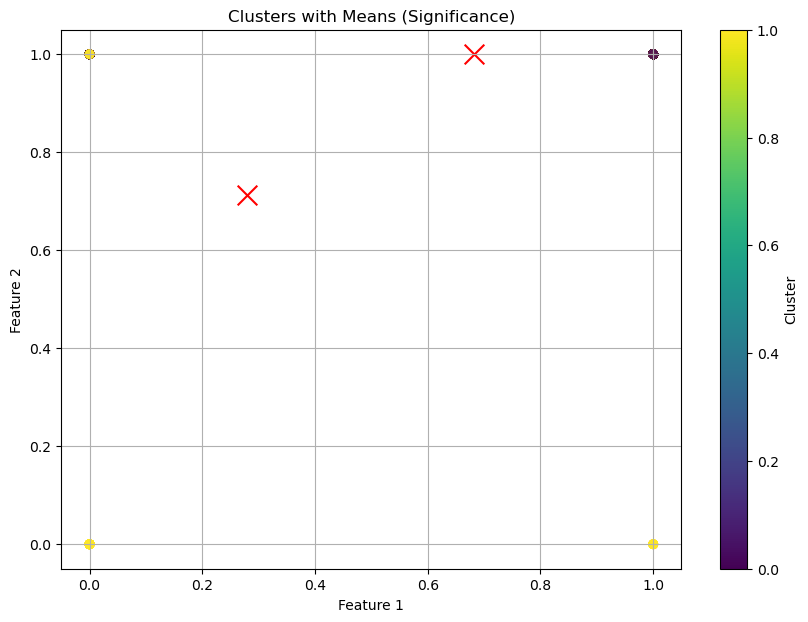

In [85]:
gmm_initial = GaussianMixture(n_components=2, n_init=10, random_state=1234)
gmm_initial.fit(X)
gmm_refit = GaussianMixture(n_components=2, n_init=10, random_state=1234)
gmm_refit.fit(X)
clusters = gmm_refit.predict(X)
plt.figure(figsize=(10, 7))
plt.scatter(X.iloc[:, 0], X.iloc[:, 1], c=clusters, cmap='viridis', marker='o', alpha=0.5)
plt.scatter(gmm_refit.means_[:, 0], gmm_refit.means_[:, 1], s=200, c='red', marker='x')
plt.title('Clusters with Means (Significance)')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.colorbar(label='Cluster')
plt.grid(True)
plt.show()

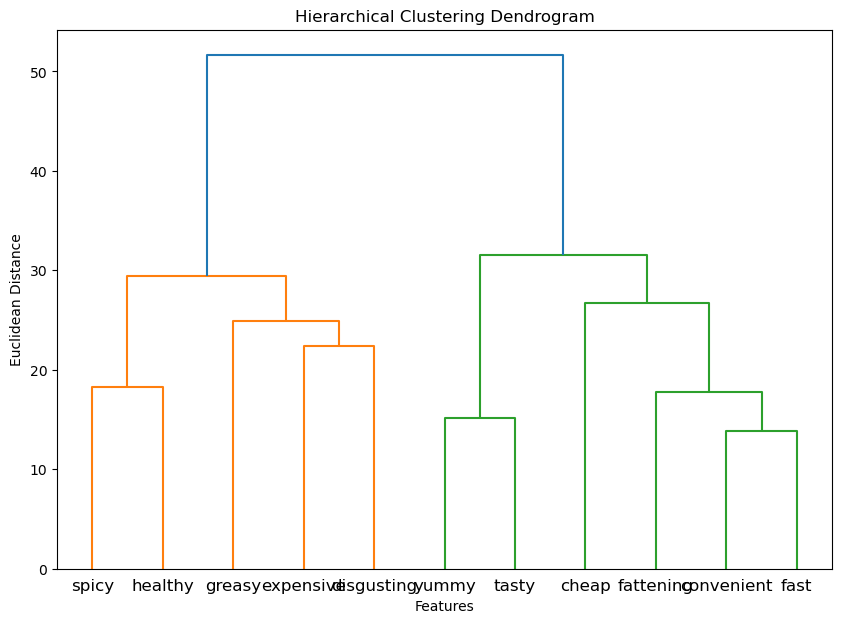

In [88]:
from scipy.spatial.distance import pdist, squareform
from scipy.cluster.hierarchy import linkage, dendrogram
MD_T = MD.T
dist_matrix = pdist(MD_T, metric='euclidean')
linkage_matrix = linkage(dist_matrix, method='ward')
plt.figure(figsize=(10, 7))
dendrogram(linkage_matrix, labels=df.columns[0:11].tolist(), orientation='top')
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Features')
plt.ylabel('Euclidean Distance')
plt.show()



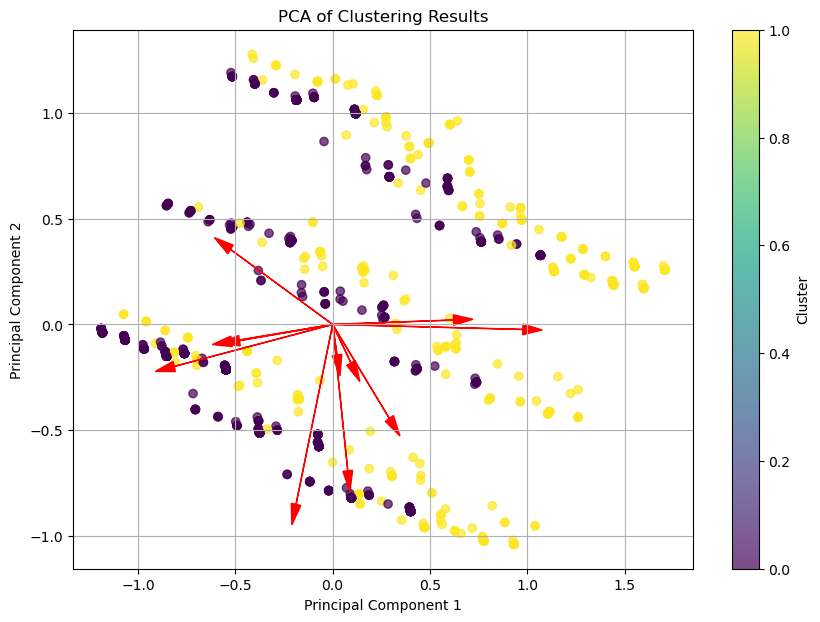

In [92]:
plt.figure(figsize=(10, 7))
scatter = plt.scatter(MD_pca[:, 0], MD_pca[:, 1], c=clusters, cmap='viridis', alpha=0.7)
plt.colorbar(scatter, label='Cluster')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA of Clustering Results
for i in range(pca.components_.shape[0]):
    plt.arrow(0, 0, pca.components_[i, 0] * max(MD_pca[:, 0]), 
              pca.components_[i, 1] * max(MD_pca[:, 1]), 
              head_width=0.05, head_length=0.1, fc='red', ec='red')

plt.grid(True)
plt.show()

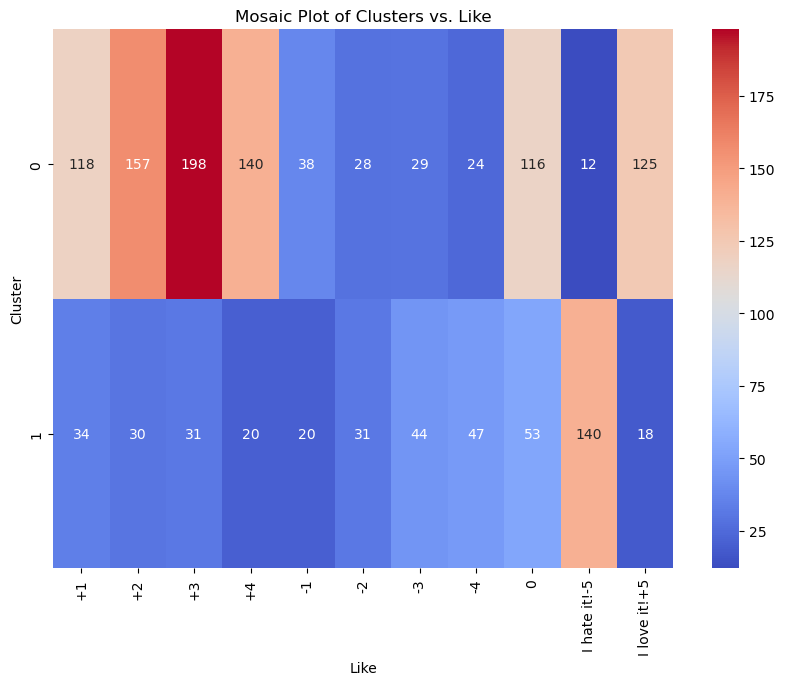

In [146]:
contingency_table = pd.crosstab(df['Cluster'], df['Like'])
plt.figure(figsize=(10, 7))
sns.heatmap(contingency_table, annot=True, cmap='coolwarm', fmt='d')
plt.title('Mosaic Plot of Clusters vs. Like')
plt.xlabel('Like')
plt.ylabel('Cluster')
plt.show()